In [1]:
import numpy as np
from scipy.signal import stft
from scipy.interpolate import interp1d
import numpy as np
import scipy.signal as signal
import soundfile as sf
import matplotlib.pyplot as plt

Define sample rate and frequency to be analyzed

In [2]:
f0 = 440
fs = 48000

Create band-pass filter coefficient

In [3]:
bandwidth = 10
lowcut = f0 - bandwidth / 2
highcut = f0 + bandwidth / 2

b, a = signal.butter(2, [lowcut / (fs / 2), highcut / (fs / 2)], btype='band')

In [4]:
data_before, _ = sf.read('2.wav')
data_after, _ = sf.read('3.wav')

l_before, r_before = data_before[:, 0], data_before[:, 1]
l_after, r_after = data_after[:, 0], data_after[:, 1]

Apply filtfilt

In [5]:
data_l_before_filtered = signal.filtfilt(b, a, l_before)
data_l_after_filtered = signal.filtfilt(b, a, l_after)
data_r_before_filtered = signal.filtfilt(b, a, r_before)
data_r_after_filtered = signal.filtfilt(b, a, r_after)

Plot the graph

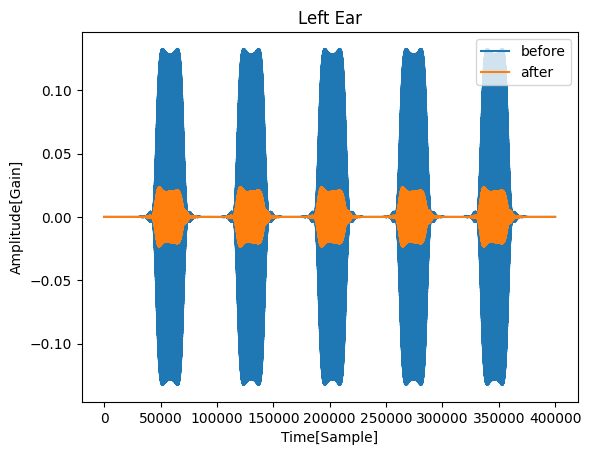

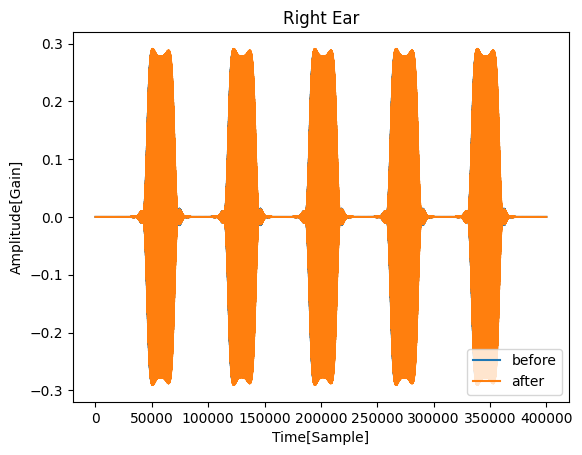

In [6]:
plt.title("Left Ear")
plt.plot(data_l_before_filtered, label="before")
plt.plot(data_l_after_filtered, label="after")
plt.legend()
plt.xlabel('Time[Sample]')
plt.ylabel('Amplitude[Gain]')
plt.show()

plt.title("Right Ear")
plt.plot(data_r_before_filtered, label="before")
plt.plot(data_r_after_filtered, label="after")
plt.legend()
plt.xlabel('Time[Sample]')
plt.ylabel('Amplitude[Gain]')
plt.show()

Compute RMS and Peak attenuation

\begin{align}
b_n &= \text{filtfilt}(\hat{b_n}, f_c=440, w=5, f_s=48000)\\
a_n &= \text{filtfilt}(\hat{a_n}, f_c=440, w=5, f_s=48000)\\
\Delta &= |b_n-a_n| \\
m &= \arg \max(\Delta) \\
\text{atten}_\text{PEAK} &= 20 * \log_{10}(|\frac{a_m}{b_m}|) \\
\text{atten}_\text{RMS} &= 20 * \log_{10}(\sqrt{\frac{\Sigma a_n^2}{\Sigma b_n^2}}) \\
\end{align}

In [7]:
def compute_rms_db(before, after):
    attenuation = 20 * np.log10(np.sqrt(np.mean(after**2) / np.mean(before**2)))
    return attenuation

In [8]:
def compute_peak_db(before, after):
    delta = np.abs(before - after)
    n_max = np.argmax(delta)
    attenuations = 20 * np.log10(np.abs(after) / np.abs(before))
    return attenuations[n_max]

In [9]:
rms_l_ = compute_rms_db(data_l_before_filtered, data_l_after_filtered)
rms_r = compute_rms_db(data_r_before_filtered, data_r_after_filtered)
peak_l_ = compute_peak_db(data_l_before_filtered, data_l_after_filtered)
peak_r = compute_peak_db(data_r_before_filtered, data_r_after_filtered)

print(f'Attenutation @ L Ear[ RMS  ]: {rms_l_:.2f} dB')
print(f'Attenutation @ L Ear[ Peak ]: {peak_l_:.2f} dB')
print(f'Attenutation @ R Ear[ RMS  ]: {rms_r:.2f} dB')
print(f'Attenutation @ R Ear[ Peak ]: {peak_r:.2f} dB')

Attenutation @ L Ear[ RMS  ]: -15.82 dB
Attenutation @ L Ear[ Peak ]: -16.10 dB
Attenutation @ R Ear[ RMS  ]: 0.10 dB
Attenutation @ R Ear[ Peak ]: 0.73 dB
